In [ ]:
from qiskit.quantum_info import *  # Import all quantum information tools
from qiskit.quantum_info import PauliList  # Use PauliList instead of StabilizerTable
import numpy as np

""" Defines the Steane code parity-check matrix.
Creates X- and Z-type stabilizers from it.
Constructs the Qiskit StabilizerTable from those stabilizers.
Prints each stabilizer and checks pairwise commutation. """

# Define the parity check matrix H (for Steane code)
H = np.array([
    [1, 1, 1, 1, 0, 0, 0],
    [0, 1, 1, 0, 1, 1, 0],
    [0, 0, 1, 1, 0, 1, 1]
])

# Function to convert binary row into Pauli string
def make_stabilizer(row, pauli_type='X'):
    n = len(row)
    z = [0] * n
    x = [0] * n
    for i in range(n):
        if row[i] == 1:
            if pauli_type == 'X':
                x[i] = 1
            elif pauli_type == 'Z':
                z[i] = 1
    return Pauli((z, x))

# Generate stabilizers
x_stabilizers = [make_stabilizer(row, 'X') for row in H]
z_stabilizers = [make_stabilizer(row, 'Z') for row in H]

# Combine all stabilizers
all_stabilizers = x_stabilizers + z_stabilizers

# Create stabilizer table using PauliList
stab_table = PauliList(all_stabilizers)

# Print all stabilizers
print("Stabilizers:")
for stab in stab_table:
    print(stab)

# Check commutation
print("\nCommutation check:")
n = len(all_stabilizers)
for i in range(n):
    for j in range(i + 1, n):
        commute = stab_table[i].commutes(stab_table[j])  # Check commutation using PauliList
        print(f"Stabilizer {i+1} and {j+1} commute: {commute}")


Stabilizers:
IIIXXXX
IXXIXXI
XXIXXII
IIIZZZZ
IZZIZZI
ZZIZZII

Commutation check:
Stabilizer 1 and 2 commute: True
Stabilizer 1 and 3 commute: True
Stabilizer 1 and 4 commute: True
Stabilizer 1 and 5 commute: True
Stabilizer 1 and 6 commute: True
Stabilizer 2 and 3 commute: True
Stabilizer 2 and 4 commute: True
Stabilizer 2 and 5 commute: True
Stabilizer 2 and 6 commute: True
Stabilizer 3 and 4 commute: True
Stabilizer 3 and 5 commute: True
Stabilizer 3 and 6 commute: True
Stabilizer 4 and 5 commute: True
Stabilizer 4 and 6 commute: True
Stabilizer 5 and 6 commute: True


In [ ]:
import stim

""" Stim, a stabilizer simulator developed by Google Quantum AI, 
is a powerful tool for simulating quantum circuits and analyzing their properties. 
It provides a Python interface for working with stabilizers, which are essential in quantum 
error correction and fault-tolerant quantum computing.
 """

xx = stim.PauliString("+XX")
zz = stim.PauliString("+ZZ")

# Pauli strings can be multiplied
mul_res = xx * zz
print("Multiplication: XX * ZZ = ", mul_res)

# Pauli strings can be concatenated
add_res = xx + zz
print("Addition: XX + ZZ = ", add_res)

# We can check if 2 Pauli strings commute
print("XX and ZZ commute: ", xx.commutes(zz))

Multiplication: XX * ZZ =  -YY
Addition: XX + ZZ =  +XXZZ
XX and ZZ commute:  True


In [11]:
# Define a Tableau simulator
simulator = stim.TableauSimulator()

# Prepare GHZ state
simulator.h(0)
simulator.cx(0,1)
simulator.cx(0,2)
simulator.measure_many(0,1,2)

[True, True, True]

In [17]:
c = stim.Circuit()

c.append("H", 0)
c.append("CNOT", [0,1,0,2])
c.append("M", [0,1,2])

print(c)
c.diagram('timeline-text')



H 0
CX 0 1 0 2
M 0 1 2


q0: -H-@-@-M:rec[0]-
       | |
q1: ---X-|-M:rec[1]-
         |
q2: -----X-M:rec[2]-

In [ ]:
sampler = c.compile_sampler()
samples = sampler.sample(shots=10)

samples

[True, True, True]

In [22]:

# Reset all qubits
simulator.reset(0,1,2)
simulator.do(c)
# All measurements are stored in the measurement record of the Tableau simulator
simulator.current_measurement_record()[-3::]

[True, True, True]

In [24]:
from stim import PauliString

# Define Steane code stabilizers
steane_stabilizer = [
    PauliString("XXXXIII"),
    PauliString("IXXIXXI"),
    PauliString("IIIXXXX"),
    PauliString("ZZZZIII"),
    PauliString("IZZIZZI"),
    PauliString("IIIZZZZ"),
]

# Define logical operators for the Steane code
log_x = PauliString("XIIIIII")  # Logical X operator
log_z = PauliString("ZIIIIII")  # Logical Z operator

# Part b: Verify that logical operators map stabilizers to themselves
mapped_stabilizers_x = [log_x * s * log_x for s in steane_stabilizer]
mapped_stabilizers_z = [log_z * s * log_z for s in steane_stabilizer]

print("Mapped stabilizers with logical X:")
for s in mapped_stabilizers_x:
    print(s)

print("\nMapped stabilizers with logical Z:")
for s in mapped_stabilizers_z:
    print(s)

# Part c: Verify commutation with stabilizers and anti-commutation between logical operators
print("\nLogical X commutes with stabilizers:")
for s in steane_stabilizer:
    print(f"Commutes with {s}: {log_x.commutes(s)}")

print("\nLogical Z commutes with stabilizers:")
for s in steane_stabilizer:
    print(f"Commutes with {s}: {log_z.commutes(s)}")

# Verify anti-commutation between logical operators
anti_commute = log_x.commutes(log_z)
print("\nLogical X and Z anti-commute:", not anti_commute)

Mapped stabilizers with logical X:
+XXXX___
+_XX_XX_
+___XXXX
-ZZZZ___
+_ZZ_ZZ_
+___ZZZZ

Mapped stabilizers with logical Z:
-XXXX___
+_XX_XX_
+___XXXX
+ZZZZ___
+_ZZ_ZZ_
+___ZZZZ

Logical X commutes with stabilizers:
Commutes with +XXXX___: True
Commutes with +_XX_XX_: True
Commutes with +___XXXX: True
Commutes with +ZZZZ___: False
Commutes with +_ZZ_ZZ_: True
Commutes with +___ZZZZ: True

Logical Z commutes with stabilizers:
Commutes with +XXXX___: False
Commutes with +_XX_XX_: True
Commutes with +___XXXX: True
Commutes with +ZZZZ___: True
Commutes with +_ZZ_ZZ_: True
Commutes with +___ZZZZ: True

Logical X and Z anti-commute: True


In [25]:
def encoding_circuit(log_qb_idx: int = 0) -> stim.Circuit:
  """Encoding scheme proposed by Goto 2015: https://www.nature.com/articles/srep19578
  To prepare the logical Steane qubit in state |0>_L.
  
  The qubit index allows shifting the indices so that we can prepare multiple logical qubits
  """
  c = stim.Circuit()
  # shift registers to target logical qubit with given index
  s = log_qb_idx * 8
  
  c.append("H", [s, 4+s, 6+s])
  c.append("CNOT", [s, 1+s])
  c.append("CNOT", [4+s, 5+s])
  c.append("CNOT", [6+s, 3+s])
  c.append("CNOT", [6+s, 5+s])
  c.append("CNOT", [4+s, 2+s])
  c.append("CNOT", [0+s, 3+s])
  c.append("CNOT", [4+s, 1+s])
  c.append("CNOT", [3+s, 2+s])
  
  # Entangle with ancilla qubit and measure logical Pauli-Z
  c.append("CNOT", [1+s, 7+s])
  c.append("CNOT", [3+s, 7+s])
  c.append("CNOT", [5+s, 7+s])
  c.append("M", [7+s])

  return c

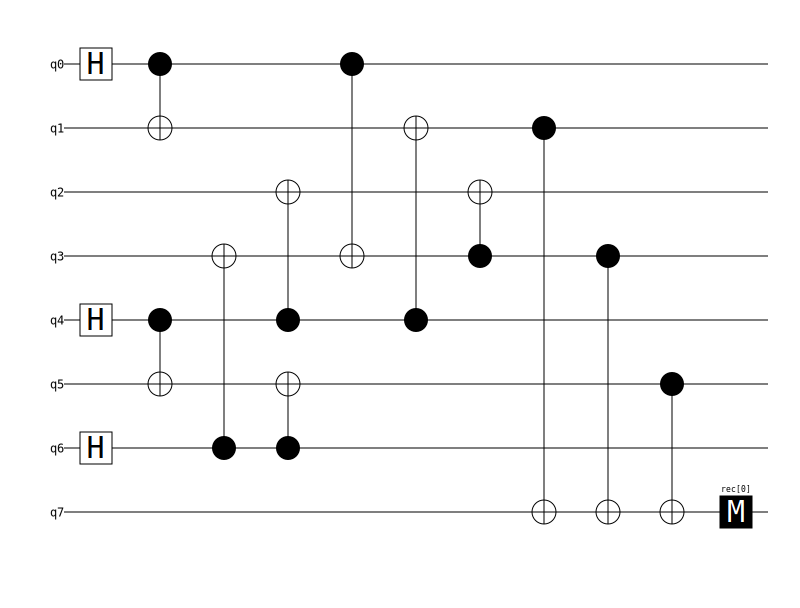

In [26]:
c = stim.Circuit()
c += encoding_circuit()
c.diagram('timeline-svg')

In [27]:
t = c.to_tableau(ignore_measurement=True)
print("Stabilizers")
t.to_stabilizers()

Stabilizers


[stim.PauliString("+XXXX____"),
 stim.PauliString("+ZZ__Z___"),
 stim.PauliString("+__ZZZ___"),
 stim.PauliString("+Z__Z__Z_"),
 stim.PauliString("+_XX_XX__"),
 stim.PauliString("+____ZZZ_"),
 stim.PauliString("+__XX_XX_"),
 stim.PauliString("+_Z_Z_Z_Z")]

In [28]:
import numpy as np

def measure_logical_qubits(log_qubit_indices: list[int] = [0]) -> stim.Circuit:
  c = stim.Circuit()
  
  for log_qubit_index in log_qubit_indices:
    # shift index
    s = log_qubit_index * 8
    # final measurement
    c.append("M", np.array([0,1,2,3,4,5,6]) + s)

  return c

def sample_from_circuit(c: stim.Circuit, shots: int = 10) -> np.array:
  # compile a sampler and sample 10 shots
  s = c.compile_sampler()
  r = s.sample(shots=shots).astype(int)
  
  return r

In [31]:
# Exercise 3: Encoding and Measuring Logical Qubits

# Helper function to encode a logical qubit
def encoding_circuit(log_qb_idx: int = 0) -> stim.Circuit:
    """
    Encoding scheme proposed by Goto 2015: https://www.nature.com/articles/srep19578
    To prepare the logical Steane qubit in state |0>_L.
    
    The qubit index allows shifting the indices so that we can prepare multiple logical qubits.
    """
    c = stim.Circuit()
    # Shift registers to target logical qubit with given index
    s = log_qb_idx * 8
    
    # Apply gates for encoding
    c.append("H", [s, 4 + s, 6 + s])
    c.append("CNOT", [s, 1 + s])
    c.append("CNOT", [4 + s, 5 + s])
    c.append("CNOT", [6 + s, 3 + s])
    c.append("CNOT", [6 + s, 5 + s])
    c.append("CNOT", [4 + s, 2 + s])
    c.append("CNOT", [0 + s, 3 + s])
    c.append("CNOT", [4 + s, 1 + s])
    c.append("CNOT", [3 + s, 2 + s])
    
    # Entangle with ancilla qubit and measure logical Pauli-Z
    c.append("CNOT", [1 + s, 7 + s])
    c.append("CNOT", [3 + s, 7 + s])
    c.append("CNOT", [5 + s, 7 + s])
    c.append("M", [7 + s])
    
    return c

# Helper function to measure logical qubits
def measure_logical_qubits(log_qubit_indices: list[int] = [0]) -> stim.Circuit:
    """
    Measure logical qubits by measuring all physical qubits in the code.
    """
    c = stim.Circuit()
    for log_qubit_index in log_qubit_indices:
        # Shift index
        s = log_qubit_index * 8
        # Final measurement
        c.append("M", np.array([0, 1, 2, 3, 4, 5, 6]) + s)
    return c

# Helper function to sample from a circuit
def sample_from_circuit(c: stim.Circuit, shots: int = 10) -> np.array:
    """
    Compile a sampler and sample a given number of shots.
    """
    s = c.compile_sampler()
    r = s.sample(shots=shots).astype(int)
    return r

# Part a: Encode a logical qubit in state |0>_L
encoding_circ = encoding_circuit(log_qb_idx=0)
print("Encoding Circuit:")
print(encoding_circ)

# Part b: Measure the logical qubit
measurement_circ = measure_logical_qubits(log_qubit_indices=[0])
print("\nMeasurement Circuit:")
print(measurement_circ)

# Combine encoding and measurement circuits
full_circuit = encoding_circ + measurement_circ
print("\nFull Circuit:")
print(full_circuit)

# Part c: Sample the circuit and display results
shots = 10
samples = sample_from_circuit(full_circuit, shots=shots)
print(f"\nSamples from the circuit ({shots} shots):")
print(samples)

Encoding Circuit:
H 0 4 6
CX 0 1 4 5 6 3 6 5 4 2 0 3 4 1 3 2 1 7 3 7 5 7
M 7

Measurement Circuit:
M 0 1 2 3 4 5 6

Full Circuit:
H 0 4 6
CX 0 1 4 5 6 3 6 5 4 2 0 3 4 1 3 2 1 7 3 7 5 7
M 7 0 1 2 3 4 5 6

Samples from the circuit (10 shots):
[[0 0 1 0 1 1 0 1]
 [0 1 0 0 1 1 1 0]
 [0 0 1 0 1 1 0 1]
 [0 0 1 1 0 1 1 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 1 0 1 0 1 0 1]
 [0 0 1 0 1 1 0 1]
 [0 1 1 1 1 0 0 0]
 [0 0 0 1 1 0 1 1]]


In [34]:
# Prepare the circuit
c = stim.Circuit()
# Prepare |0>_L
c += encoding_circuit()
# Append final measurement
c += measure_logical_qubits()
# Sample from the circuit
r = sample_from_circuit(c, shots=10)

# Compute Z_L observable from measurement
# Logical Z_L corresponds to the parity of the first physical qubit
logical_measurement_output = r[:, 0]  # Extract the first column (first qubit measurements)

# Display the logical measurement output
print("Logical measurement output (Z_L):", logical_measurement_output)

Logical measurement output (Z_L): [0 0 0 0 0 0 0 0 0 0]


In [37]:
print("Ancilla qubit measurement outcome: ", r[:,0])
# if no noise, we expect all 0s
print("Logical qubit measurement outcome: ", r[:,1:])



Ancilla qubit measurement outcome:  [0 0 0 0 0 0 0 0 0 0]
Logical qubit measurement outcome:  [[1 1 1 1 0 0 0]
 [1 0 1 0 1 0 1]
 [0 0 1 1 0 1 1]
 [1 0 1 0 1 0 1]
 [0 1 0 1 1 0 1]
 [1 1 0 0 0 1 1]
 [1 1 1 1 0 0 0]
 [1 0 0 1 1 1 0]
 [0 1 1 0 1 1 0]
 [1 0 1 0 1 0 1]]


In [38]:
# Exercise 4: Logical Single-Qubit Gates

def logical_single_qubit_gate(gate: str, log_qb_idx: int = 0) -> stim.Circuit:
    """
    Supported logical gates:
        - "Z": Logical Z gate
        - "X": Logical X gate
        - "H": Logical Hadamard gate
        - "S": Logical S (phase) gate
        - "S_DAG": Logical S-dagger (inverse phase) gate
    
    Args:
        gate (str): The name of the logical gate to apply. Must be one of: "Z", "X", "H", "S", "S_DAG".
        log_qb_idx (int, optional): Index of the logical qubit to operate on. Defaults to 0.
            Each logical qubit uses 8 physical qubits (7 data + 1 ancilla).
            
    Returns:
        stim.Circuit: The circuit with the logical gate applied.
    """
    c = stim.Circuit()
    # Shift registers to target logical qubit with given index
    s = log_qb_idx * 8
    
    match gate:
        case "Z":
            # Logical Z gate acts on the first physical qubit
            c.append("Z", [0 + s])
        case "X":
            # Logical X gate acts on the first physical qubit
            c.append("X", [0 + s])
        case "H":
            # Logical Hadamard gate acts on the first physical qubit
            c.append("H", [0 + s])
        case "S":
            # Logical S (phase) gate acts on all physical qubits
            c.append("S", np.array([0, 1, 2, 3, 4, 5, 6]) + s)
        case "S_DAG":
            # Logical S-dagger (inverse phase) gate acts on all physical qubits
            c.append("S_DAG", np.array([0, 1, 2, 3, 4, 5, 6]) + s)
        case _:
            raise ValueError(f"Logical gate name '{gate}' undefined")

    return c

# Example usage of logical_single_qubit_gate
c = stim.Circuit()
c += logical_single_qubit_gate("H", log_qb_idx=0)  # Apply logical Hadamard gate
c += logical_single_qubit_gate("X", log_qb_idx=0)  # Apply logical X gate
c += logical_single_qubit_gate("S", log_qb_idx=0)  # Apply logical S gate
print(c)


H 0
X 0
S 0 1 2 3 4 5 6


In [39]:
def prepare_stab_eigenstate(stabilizer: str) -> stim.Circuit:
  """Generates a circuit preparing the Eigenstate of a given singe-qubit stabilizer"""
  
  c = stim.Circuit()
  
  match stabilizer:
    case "+Z": # |0>
      pass
    case "-Z": # |1>
      c += logical_single_qubit_gate(gate="X")
    case "+X": # |+>
      c += logical_single_qubit_gate(gate="H")
    case "-X": # |->
      c += logical_single_qubit_gate(gate="X")
      c += logical_single_qubit_gate(gate="H")
    case "+Y": # |+i>
      c += logical_single_qubit_gate(gate="H")
      c += logical_single_qubit_gate(gate="S")
    case "-Y": # |-i>
      c += logical_single_qubit_gate(gate="X")
      c += logical_single_qubit_gate(gate="H")
      c += logical_single_qubit_gate(gate="S")
    case _:
      raise ValueError(f"Unknown stabilizer {stabilizer}")
    
  return c

In [40]:
c = stim.Circuit()
# prepare |0>_L
c += encoding_circuit()
# apply a bit-flip
c += logical_single_qubit_gate(gate="X")
# append final measurement
c += measure_logical_qubits()
# sample from circuit
r = sample_from_circuit(c, shots=10)

logical_measurement_output = r[:,5] ^ r[:,6] ^ r[:,7]
print("Logical bit-flip measurement outcome: ", logical_measurement_output)

Logical bit-flip measurement outcome:  [0 0 0 0 0 0 0 0 0 0]


In [41]:
c = stim.Circuit()
# prepare |0>_L
c += encoding_circuit()
# apply a logical Hadamard gate
c += prepare_stab_eigenstate("-Z")
# append final measurement
c += measure_logical_qubits()
# sample from circuit
r = sample_from_circuit(c, shots=20)

# compute Z_L observable from measurement
logical_measurement_output = r[:,5] ^ r[:,6] ^ r[:,7]
print("Logical Hadamard measurement outcome: ", logical_measurement_output)

Logical Hadamard measurement outcome:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [42]:
c = stim.Circuit()
# prepare |0>_L
c += encoding_circuit()
# apply a logical X by using logical HZH construction
c += logical_single_qubit_gate(gate="H")
c += logical_single_qubit_gate(gate="Z")
c += logical_single_qubit_gate(gate="H")
# append final measurement
c += measure_logical_qubits()
# sample from circuit
r = sample_from_circuit(c, shots=20)

# compute Z_L observable from measurement
logical_measurement_output = r[:,5] ^ r[:,6] ^ r[:,7]
print("Logical bit-flip measurement outcome: ", logical_measurement_output)

Logical bit-flip measurement outcome:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [43]:
# Exercise 5: Measuring in Different Basis

def rotate_to_measurement_basis(meas_basis: str) -> stim.Circuit:
    """
    Appends single-qubit rotations to a circuit to prepare measurement in the specified basis.

    Args:
        meas_basis (str): The target measurement basis. Must be one of "Z", "X", or "Y".

    Returns:
        stim.Circuit: The circuit with the rotations applied for the specified measurement basis.
    """
    c = stim.Circuit()
    
    match meas_basis:
        case "Z":
            # No rotation needed for Z-basis
            pass
        case "X":
            # Rotate to X-basis using a Hadamard gate
            c += logical_single_qubit_gate(gate="H")
        case "Y":
            # Rotate to Y-basis using S-dagger and Hadamard gates
            c += logical_single_qubit_gate(gate="S_DAG")
            c += logical_single_qubit_gate(gate="H")
        case _:
            raise ValueError("Specified target basis not known")
    
    return c

# Prepare the circuit
c = stim.Circuit()
# Prepare |0>_L
c += encoding_circuit()
# Rotate to X-basis
c += rotate_to_measurement_basis(meas_basis="X")
# Append final measurement
c += measure_logical_qubits()
# Sample from the circuit
r = sample_from_circuit(c, shots=10)

# Compute Z_L observable from measurement
logical_measurement_output = r[:, 5] ^ r[:, 6] ^ r[:, 7]
print("Logical bit-flip measurement outcome: ", logical_measurement_output)

Logical bit-flip measurement outcome:  [0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Exercise 5: to be continued
